### **形态学应用**

* 图像形态学中腐蚀可以将较小的噪声区域去除，但是会将图像主要区域的面积缩小，噪声主要区域形状发生改变；膨胀可以扩充每个区域的面积，填充较小的空洞，但是会增加早僧的面积；根据两者的特性，将二者适当结合，既可以去除噪声、又不缩小主要区域的面积；既填充了较小的空洞，又不增加噪声所占的面积

* 图像运算有开运算、闭运算、形态学梯度运算、顶帽运算、黑帽运算和击中击不中变换

* OpenCV4没有提供具体运算的函数，而是提供了图像腐蚀和膨胀运算的不同组合形式函数cv.morphologyEx()，第2个参数可以选择形态学操作类型，具体标志为：
  * cv.MORPH_ERODE 图像腐蚀
  * cv.MORPH_DILATE 图像膨胀
  * cv.MORPH_OPEN 开运算
  * cv.MORPH_CLOSE 闭运算
  * cv.MORPH_GRADIENT 形态学梯度运算
  * cv.MORPH_TOPHAT 顶帽运算
  * cv.MORPH_BLACKHAT 黑帽运算
  * cv.MORPH_HITMISS 击中击不中运算

* 开运算：先腐蚀再膨胀，用于去除图像中的噪声、消除较小的连通域、保留较大的连通域

* 闭运算：先膨胀再腐蚀，用于去除连通域内的小型空洞、平滑物体的轮廓、连接两个邻近的连通域

* 形态学梯度运算：分为基本梯度、内部梯度和外部梯度：
  * 基本梯度：图像膨胀后和腐蚀后图像间的差值图像
  * 内部梯度：原图像和腐蚀后图像间的差值图像
  * 外部梯度：图像膨胀后和原图像间的差值图像

* 顶帽运算：原图像和开运算结果之间的差值，用于分离比邻近点亮一点的斑块

* 黑帽运算：原图像与闭运算结果之间的差值，用于分离比邻近点暗一点的斑块

* 击中击不中变换：在图像中寻找和结构元素完全相同的像素中心，完全相同保留，不完全相同删除

In [43]:
# -*- coding:utf-8 -*-
import cv2 as cv
import numpy as np
import sys
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# 设置中文字体
matplotlib.rcParams['font.family'] = 'simhei'
matplotlib.rcParams['axes.unicode_minus'] = False
rootpath = '/home/zomnk/python_ws/02-OpenCV4/images/'

In [44]:
# 生成二值矩阵src
src = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                [0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 0],
                [0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0],
                [0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0],
                [0, 255, 255, 255, 0, 255, 255, 255, 0, 0, 0, 0],
                [0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0],
                [0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 255, 0],
                [0, 255, 255, 255, 255, 255, 255, 255, 0, 0, 0, 0],
                [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype='uint8')
# 生成3×3的矩形结构元素
kernel = cv.getStructuringElement(0, (3, 3))

In [45]:
# 对二值矩阵分别进行形态学运算
open_src = cv.morphologyEx(src, cv.MORPH_OPEN, kernel)
close_src = cv.morphologyEx(src, cv.MORPH_CLOSE, kernel)
gradient_src = cv.morphologyEx(src, cv.MORPH_GRADIENT, kernel)
tophat_src = cv.morphologyEx(src, cv.MORPH_TOPHAT, kernel)
blackhat_src = cv.morphologyEx(src, cv.MORPH_BLACKHAT, kernel)
hitmiss_src = cv.morphologyEx(src, cv.MORPH_HITMISS, kernel)

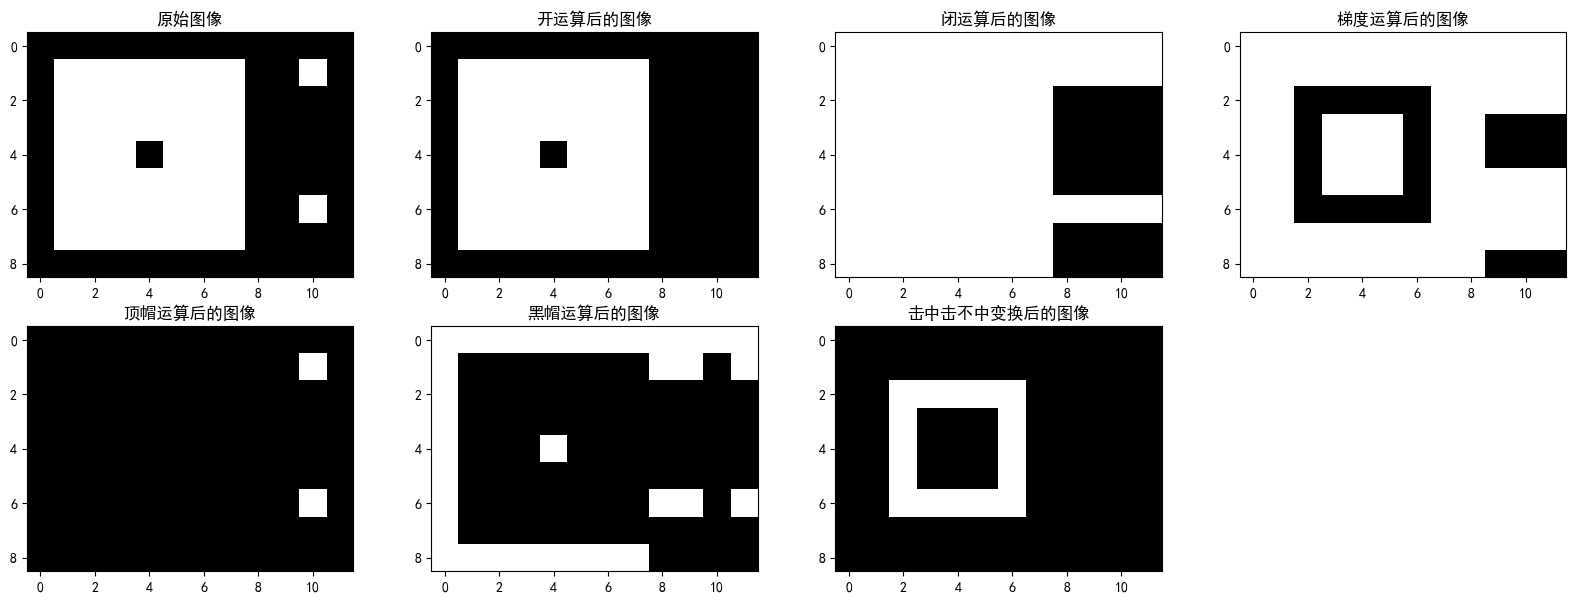

In [46]:
# 展示结果
plt.figure(figsize=(20, 7))
plt.subplot(2, 4, 1)
plt.title('原始图像')
plt.imshow(src, cmap='gray')
plt.subplot(2, 4, 2)
plt.title('开运算后的图像')
plt.imshow(open_src, cmap='gray')
plt.subplot(2, 4, 3)
plt.title('闭运算后的图像')
plt.imshow(close_src, cmap='gray')
plt.subplot(2, 4, 4)
plt.title('梯度运算后的图像')
plt.imshow(gradient_src, cmap='gray')
plt.subplot(2, 4, 5)
plt.title('顶帽运算后的图像')
plt.imshow(tophat_src, cmap='gray')
plt.subplot(2, 4, 6)
plt.title('黑帽运算后的图像')
plt.imshow(blackhat_src, cmap='gray')
plt.subplot(2, 4, 7)
plt.title('击中击不中变换后的图像')
plt.imshow(hitmiss_src, cmap='gray')

In [47]:
# 读取图像并判断是否读取成功
img = cv.imread(rootpath +'keys.jpg', cv.IMREAD_GRAYSCALE)
if img is None:
    print('Failed to read keys.jpg')
    sys.exit
# 进行二值化，阈值大小为130
keys = cv.threshold(img, 130, 255, cv.THRESH_BINARY)[1]

In [48]:
# 生成 5 × 5的句型结构元素
kernel_keys = cv.getStructuringElement(0, (5, 5))

In [49]:
# 对图像分别进行形态学运算
open_keys = cv.morphologyEx(keys, cv.MORPH_OPEN, kernel)
close_keys = cv.morphologyEx(keys, cv.MORPH_CLOSE, kernel)
gradient_keys = cv.morphologyEx(keys, cv.MORPH_GRADIENT, kernel)
tophat_keys = cv.morphologyEx(keys, cv.MORPH_TOPHAT, kernel)
blackhat_keys = cv.morphologyEx(keys, cv.MORPH_BLACKHAT, kernel)
hitmiss_keys = cv.morphologyEx(keys, cv.MORPH_HITMISS, kernel)

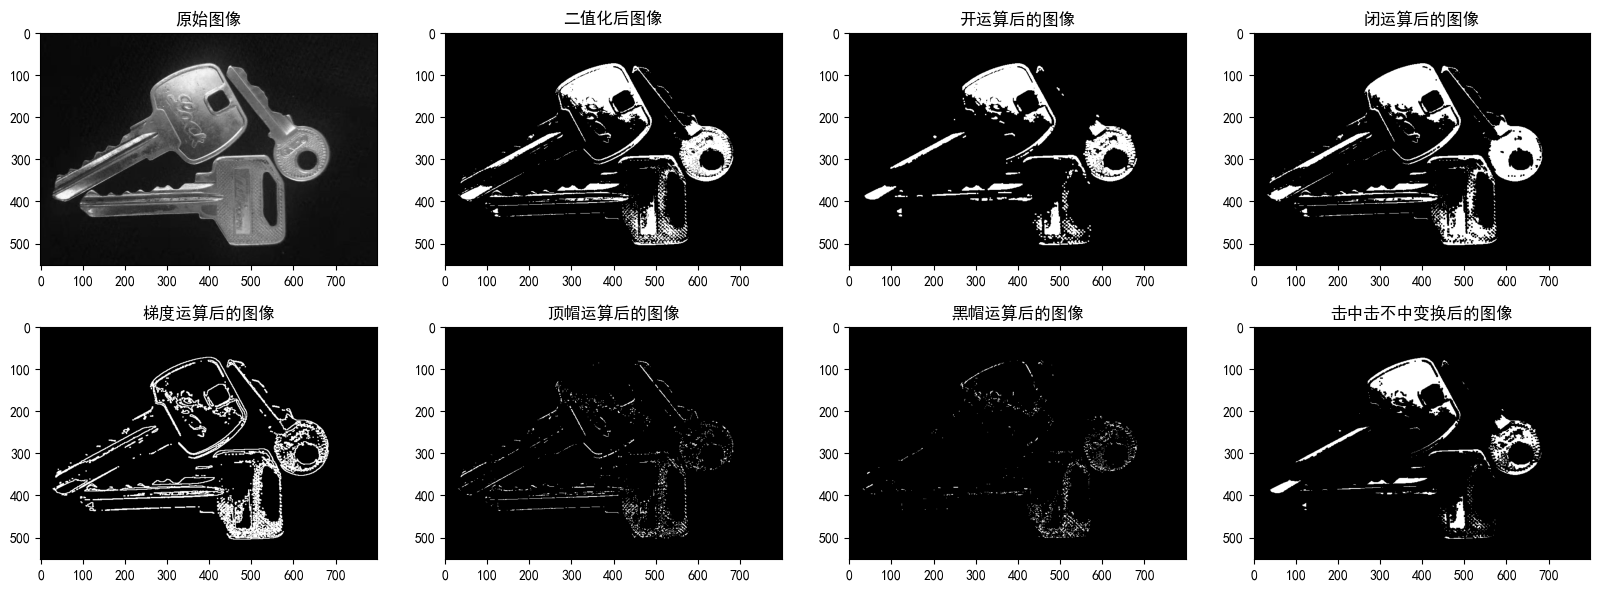

In [50]:
# 展示结果
plt.figure(figsize=(20, 7))
plt.subplot(2, 4, 1)
plt.title('原始图像')
plt.imshow(img, cmap='gray')
plt.subplot(2, 4, 2)
plt.title('二值化后图像')
plt.imshow(keys, cmap='gray')
plt.subplot(2, 4, 3)
plt.title('开运算后的图像')
plt.imshow(open_keys, cmap='gray')
plt.subplot(2, 4, 4)
plt.title('闭运算后的图像')
plt.imshow(close_keys, cmap='gray')
plt.subplot(2, 4, 5)
plt.title('梯度运算后的图像')
plt.imshow(gradient_keys, cmap='gray')
plt.subplot(2, 4, 6)
plt.title('顶帽运算后的图像')
plt.imshow(tophat_keys, cmap='gray')
plt.subplot(2, 4, 7)
plt.title('黑帽运算后的图像')
plt.imshow(blackhat_keys, cmap='gray')
plt.subplot(2, 4, 8)
plt.title('击中击不中变换后的图像')
plt.imshow(hitmiss_keys, cmap='gray')